In [171]:
%matplotlib inline

In [172]:
import lightkurve as lk

In [173]:
import numpy as np

In [174]:
import matplotlib.pyplot as plt

In [175]:
search_ffi = lk.search_tesscut('TIC 842133310')

In [176]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 08,2019,TESScut,1426,TIC 842133310,0.0
1,TESS Sector 35,2021,TESScut,475,TIC 842133310,0.0
2,TESS Sector 45,2021,TESScut,475,TIC 842133310,0.0
3,TESS Sector 46,2021,TESScut,475,TIC 842133310,0.0


In [177]:
search_tpf = lk.search_targetpixelfile('TIC 842133310')

In [178]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 61,2023,SPOC,120,842133310,0.0


In [179]:
search_lcf = lk.search_lightcurve('TIC 842133310')

In [180]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 61,2023,SPOC,120,842133310,0.0


In [181]:
search_lcf_refined = lk.search_lightcurve('TIC 842133310', author="SPOC", exptime=120)

In [182]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 61,2023,SPOC,120,842133310,0.0


In [183]:
lcf = search_lcf_refined.download_all()

In [184]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 842133310" SECTOR=61 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [185]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2962.804274148097,———,———,5.1093367e-03,1249448,247.44736,761.93598,1.3712897e+03,1.3237673e+01,9.1657588e+03,7.1347742e+00,———,———,1000000000000,———,———,———,———,247.44736,7.1366746e-03,761.93598,6.2634847e-03,4.2651128e-02,1.0686978e-01
2962.805663084772,———,———,5.1093851e-03,1249449,247.45281,761.93540,1.3939572e+03,1.3278644e+01,9.2099082e+03,7.1536632e+00,———,———,1000000000000,———,———,———,———,247.45281,7.0612766e-03,761.93540,6.1830655e-03,4.8199233e-02,1.0370361e-01
2962.8070520219103,———,———,5.1094340e-03,1249450,247.44738,761.94152,1.3803639e+03,1.3306104e+01,9.2676758e+03,7.1721177e+00,———,———,1000000000000,———,———,———,———,247.44738,7.1289311e-03,761.94152,6.2544541e-03,4.0162019e-02,1.0580006e-01
2962.8084409585845,———,———,5.1094824e-03,1249451,247.43294,761.93189,1.3754272e+03,1.3336267e+01,9.3178232e+03,7.1954851e+00,———,———,1000000000000,———,———,———,———,247.43294,7.1237409e-03,761.93189,6.2925443e-03,4.4402950e-02,9.9487990e-02
2962.8098298957234,———,———,5.1095313e-03,1249452,247.44358,761.94189,1.3904448e+03,1.3373389e+01,9.3652412e+03,7.2075777e+00,———,———,1000000000000,———,———,———,———,247.44358,7.0978436e-03,761.94189,6.2436983e-03,4.3540999e-02,1.0187077e-01
2962.811218832396,———,———,5.1095798e-03,1249453,247.46287,761.92558,1.3625928e+03,1.3404217e+01,9.4330977e+03,7.2344174e+00,———,———,1000000000000,———,———,———,———,247.46287,7.3346817e-03,761.92558,6.3843713e-03,4.2253405e-02,1.0451556e-01
2962.8126077695356,———,———,5.1096287e-03,1249454,247.44541,761.92547,1.3683644e+03,1.3434179e+01,9.4790850e+03,7.2502933e+00,———,———,1000000000000,———,———,———,———,247.44541,7.2571491e-03,761.92547,6.3777007e-03,4.5575213e-02,1.0495232e-01
2962.8139967066754,———,———,5.1096776e-03,1249455,247.44904,761.94121,1.3777424e+03,1.3472722e+01,9.5347979e+03,7.2717776e+00,———,———,1000000000000,———,———,———,———,247.44904,7.2373557e-03,761.94121,6.3423780e-03,4.4272460e-02,1.0054718e-01


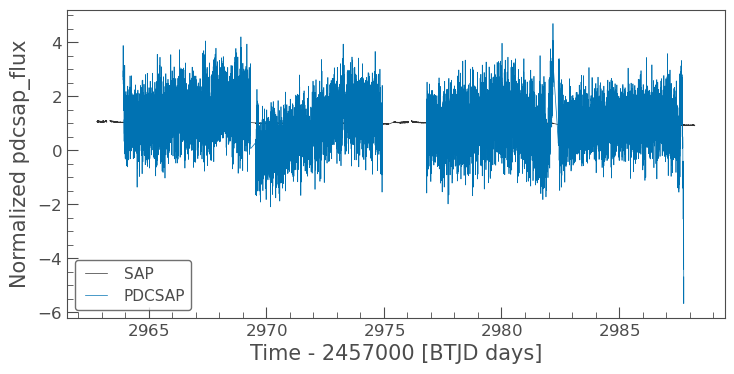

In [186]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of ')

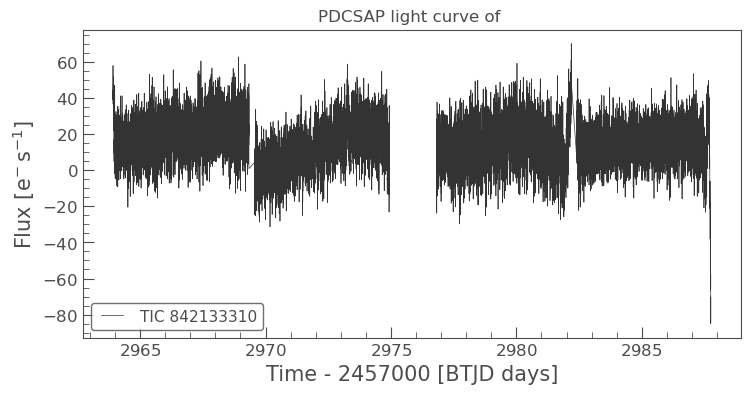

In [187]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of ")

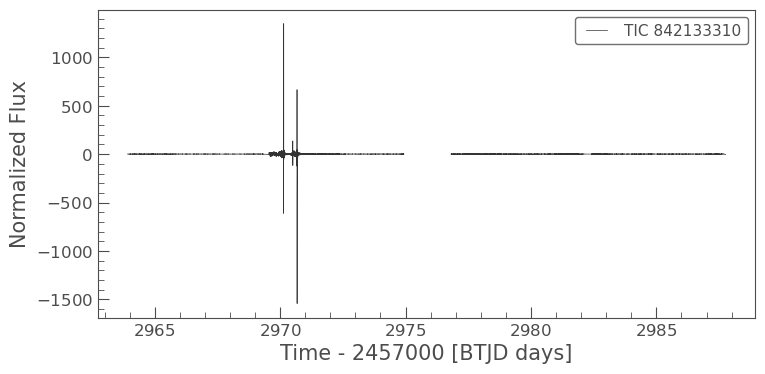

In [188]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

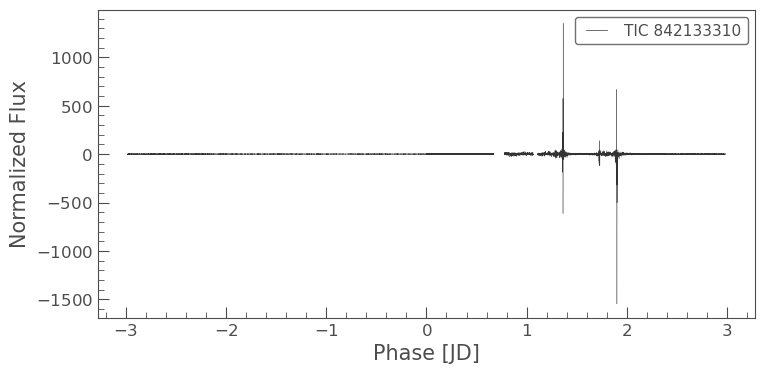

In [189]:
folded_lc = flat_lc.fold(period=5.970)
folded_lc.plot();

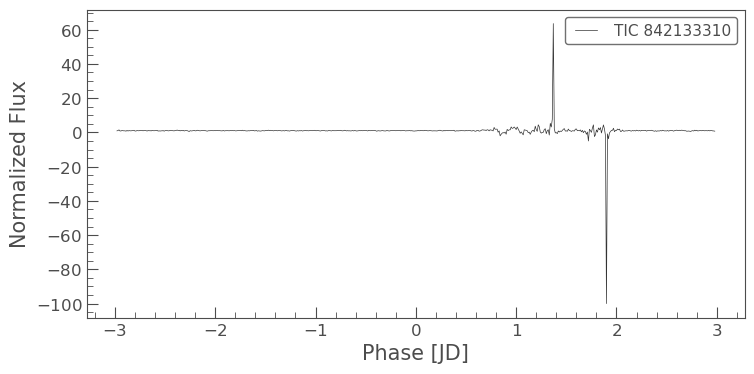

In [190]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

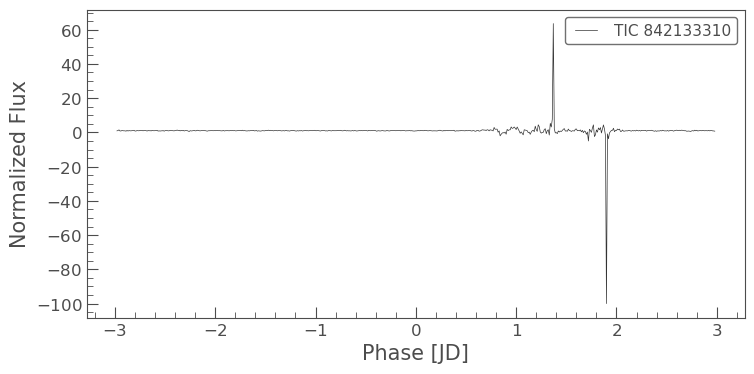

In [191]:
lcf[0].flatten(window_length=401).fold(period=5.970).bin(time_bin_size=0.01).plot();

In [192]:
lcf[0].interact_bls()

In [193]:
ffi_data = search_ffi[1].download(cutout_size=20)

<AxesSubplot:title={'center':'Target ID: TIC 842133310, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

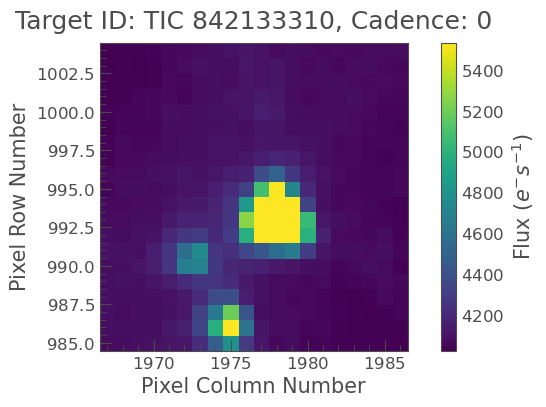

In [194]:
ffi_data.plot()

In [195]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

27

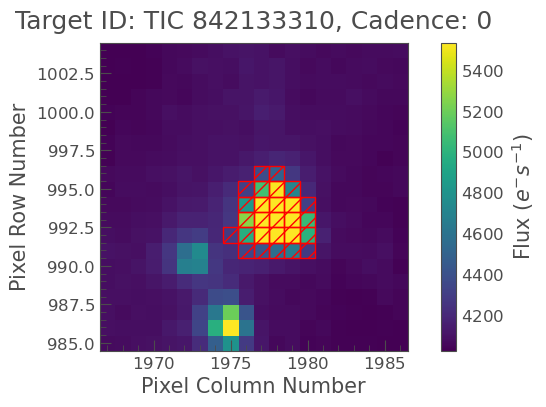

In [196]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [197]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [198]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
2255.002300003247,168531.109375,19.538253784179688,1977.889862803288,993.0644675637593,0,0
2255.0092444912398,175268.421875,19.923877716064453,1977.8860084134121,993.0655120791733,1,2048
2255.0161889801625,182574.53125,20.333290100097656,1977.8821584073755,993.0683898730998,2,2048
2255.02313346955,190477.859375,20.768640518188477,1977.878110361908,993.0700261064217,3,2048
2255.030077959405,199190.109375,21.236528396606445,1977.8736703970853,993.0723809572976,4,2048
2255.0370224501903,210926.578125,21.851959228515625,1977.8695378583861,993.073820581525,5,2048
2255.043966941908,237811.875,23.199907302856445,1977.8579772959324,993.0791460584489,6,2048
2255.0509114340903,302677.15625,26.172794342041016,1977.8415007942403,993.0860516449612,7,2048


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

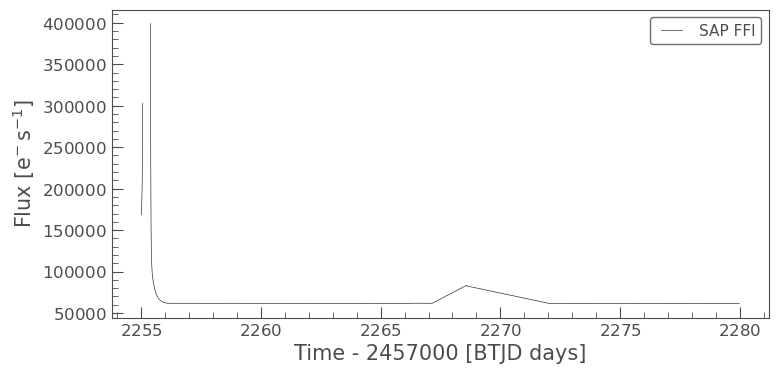

In [199]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

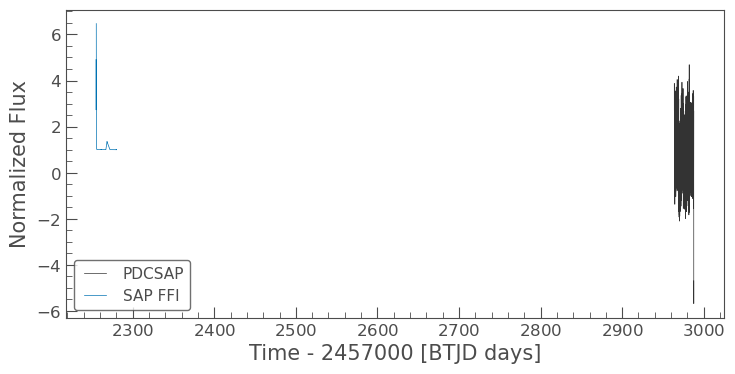

In [200]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [201]:
ffi_data.interact()

In [202]:
ffi_data.interact_sky()

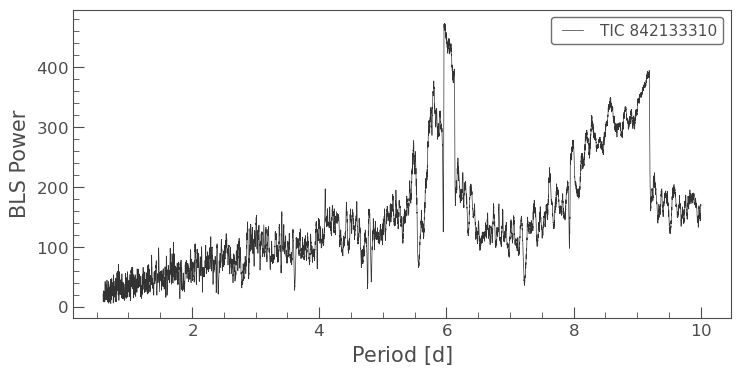

In [203]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [204]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 5.970 d


C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
